<a href="https://colab.research.google.com/github/jhno-code/2020-2/blob/main/Practica_CUDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

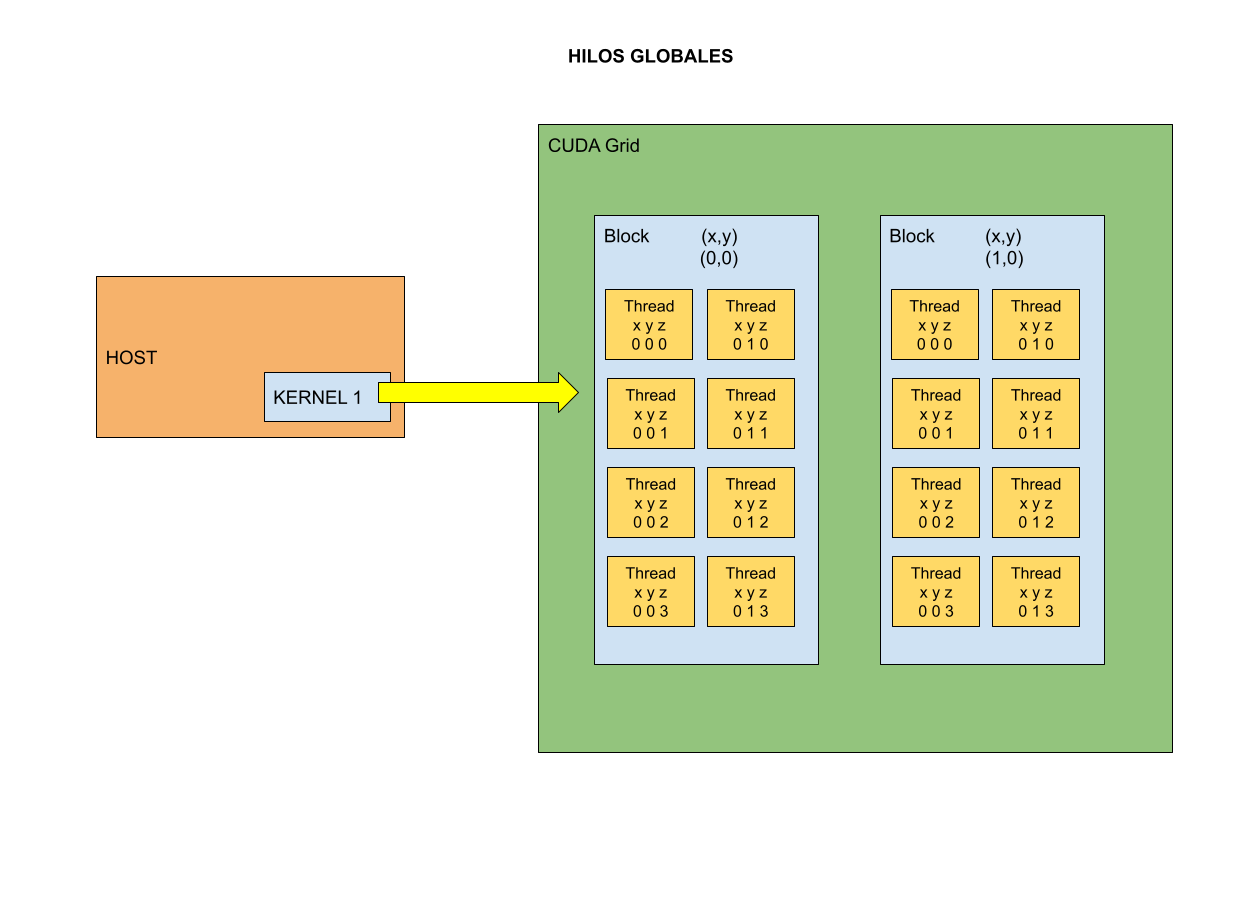

In [2]:
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-9.2
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git
%load_ext nvcc_plugin

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-kernel-common-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-304-updates-dev' for glob 'nvidia*'
Note, selecting 'nvidia-compute-utils-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-libopencl1-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-340-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-source-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-331-updates-uvm' for glob 'nvidi

In [18]:
%%cu
#include "cuda_runtime.h"
#include "device_launch_parameters.h"
#include <stdio.h>
#include <stdlib.h>

__global__ void helloworld()
{ 
    printf("Hola Mundo..! Soy el hilo con id bloque: {%d %d %d}, id de hilo{ %d %d %d }\n", 
	  blockIdx.x, blockIdx.y, blockIdx.z, threadIdx.x, threadIdx.y, threadIdx.z);
}

int main()
{
    dim3 threads(1, 2, 2); //--nro de hilos por bloque
    dim3 grid(1, 2, 2); //--nro de bloques por grid
    helloworld <<< grid, threads >>> (); //--se define un hilo por bloque
    cudaDeviceSynchronize();
    return 0;

}

Hola Mundo..! Soy el hilo con id bloque: {0 0 1}, id de hilo{ 0 0 0 }
Hola Mundo..! Soy el hilo con id bloque: {0 0 1}, id de hilo{ 0 1 0 }
Hola Mundo..! Soy el hilo con id bloque: {0 0 1}, id de hilo{ 0 0 1 }
Hola Mundo..! Soy el hilo con id bloque: {0 0 1}, id de hilo{ 0 1 1 }
Hola Mundo..! Soy el hilo con id bloque: {0 0 0}, id de hilo{ 0 0 0 }
Hola Mundo..! Soy el hilo con id bloque: {0 0 0}, id de hilo{ 0 1 0 }
Hola Mundo..! Soy el hilo con id bloque: {0 0 0}, id de hilo{ 0 0 1 }
Hola Mundo..! Soy el hilo con id bloque: {0 0 0}, id de hilo{ 0 1 1 }
Hola Mundo..! Soy el hilo con id bloque: {0 1 0}, id de hilo{ 0 0 0 }
Hola Mundo..! Soy el hilo con id bloque: {0 1 0}, id de hilo{ 0 1 0 }
Hola Mundo..! Soy el hilo con id bloque: {0 1 0}, id de hilo{ 0 0 1 }
Hola Mundo..! Soy el hilo con id bloque: {0 1 0}, id de hilo{ 0 1 1 }
Hola Mundo..! Soy el hilo con id bloque: {0 1 1}, id de hilo{ 0 0 0 }
Hola Mundo..! Soy el hilo con id bloque: {0 1 1}, id de hilo{ 0 1 0 }
Hola Mundo..! Soy el

In [22]:
%%cu
#include "cuda_runtime.h"
#include "device_launch_parameters.h"
#include <stdio.h>
#include <stdlib.h>

// declaracion de funciones
// GLOBAL: funcion llamada desde el host y ejecutada en el device (kernel)
__global__ void suma_GPU(int a, int b, int* c)
{
  *c = a + b;
}
// HOST: funcion llamada y ejecutada desde el host
__host__ int suma_CPU(int a, int b)
{
  return (a + b);
}
int main()
{
  // declaraciones
  int n1 = 1, n2 = 2, c = 0;
  int* hst_c;
  int m1 = 10, m2 = 20;
  int* dev_c;

  // reserva en el host
  hst_c = (int*)malloc(sizeof(int));

  // reserva en el device
  cudaMalloc((void**)&dev_c, sizeof(int));
 
  // llamada a la funcion suma_CPU
  c = suma_CPU(n1, n2);
 
  // resultados CPU
  printf("CPU:\n");
  printf("%2d + %2d = %2d \n", n1, n2, c);
 
  // llamada a la funcion suma_GPU
  suma_GPU << <1, 1 >> > (m1, m2, dev_c);
 
  // recogida de datos desde el device
  cudaMemcpy(hst_c, dev_c, sizeof(int), cudaMemcpyDeviceToHost);
 
  // resultados GPU
  printf("GPU:\n");
  printf("%2d + %2d = %2d \n", m1, m2, *hst_c);
 
  // salida
  printf("\npulsa INTRO para finalizar...");
  fflush(stdin);
  char tecla = getchar();
 
  return 0;
}

CPU:
 1 +  2 =  3 
GPU:
10 + 20 = 30 

pulsa INTRO para finalizar...
